In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/mental_tiredness_score_prediction_dataset.csv")
df.head()

,workload,stress_level,working_hours,sleep_hours,screen_time,exercise_hours,gender,job_role,work_type,mental_tiredness_score
0,71,5,7,8,2,0,Female,IT,Remote,33.907427
1,34,5,4,7,2,1,Female,HR,Hybrid,15.797104
2,91,7,7,8,7,1,Male,HR,Remote,58.698030
3,80,1,10,5,3,0,Male,Finance,Hybrid,41.238385
4,40,4,8,5,2,3,Male,Operations,Hybrid,20.383237


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   workload                15000 non-null  int64  
 1   stress_level            15000 non-null  int64  
 2   working_hours           15000 non-null  int64  
 3   sleep_hours             15000 non-null  int64  
 4   screen_time             15000 non-null  int64  
 5   exercise_hours          15000 non-null  int64  
 6   gender                  15000 non-null  object 
 7   job_role                15000 non-null  object 
 8   work_type               15000 non-null  object 
 9   mental_tiredness_score  15000 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 1.1+ MB


In [4]:
df.isna().sum() / len(df) * 100

,0
workload,0.0
stress_level,0.0
working_hours,0.0
sleep_hours,0.0
screen_time,0.0
exercise_hours,0.0
gender,0.0
job_role,0.0
work_type,0.0
mental_tiredness_score,0.0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
for i in df.columns:
    if df[i].dtype != "O":
        if df[i].isna().sum() > 0:
            df[i] = df[i].fillna(df[i].median())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   workload                15000 non-null  int64  
 1   stress_level            15000 non-null  int64  
 2   working_hours           15000 non-null  int64  
 3   sleep_hours             15000 non-null  int64  
 4   screen_time             15000 non-null  int64  
 5   exercise_hours          15000 non-null  int64  
 6   gender                  15000 non-null  object 
 7   job_role                15000 non-null  object 
 8   work_type               15000 non-null  object 
 9   mental_tiredness_score  15000 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 1.1+ MB


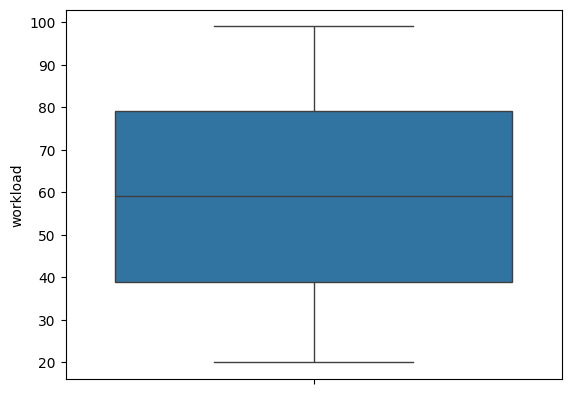

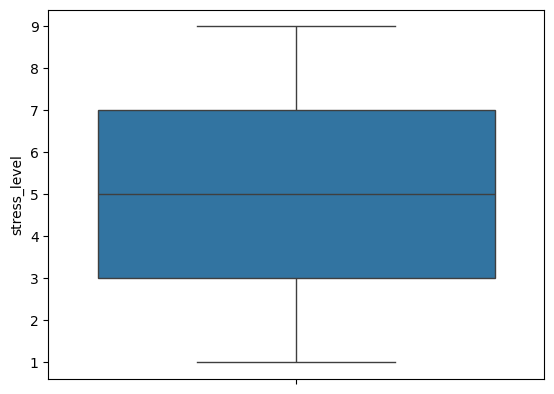

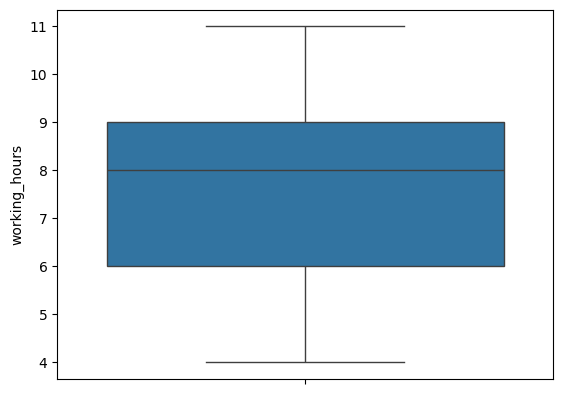

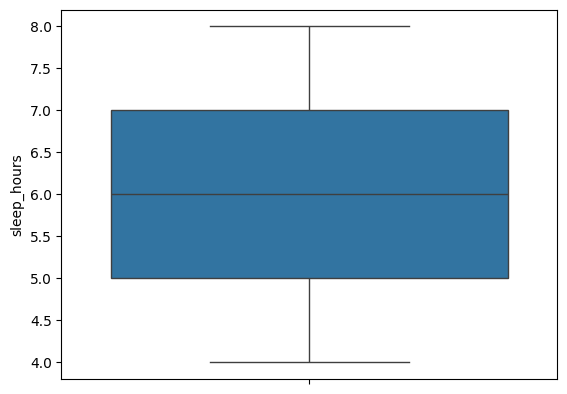

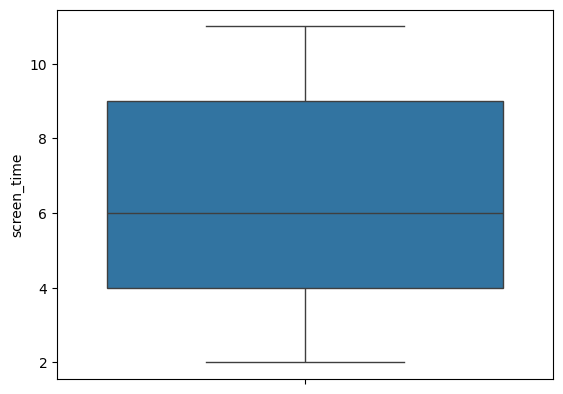

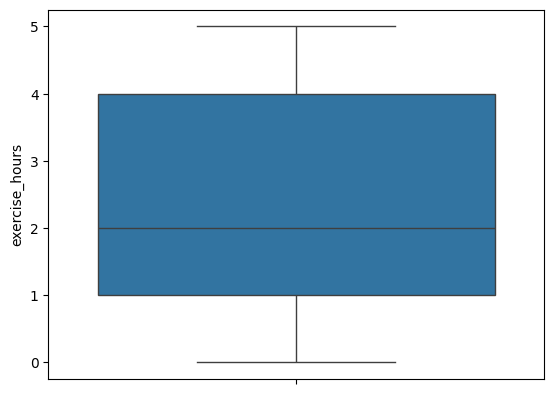

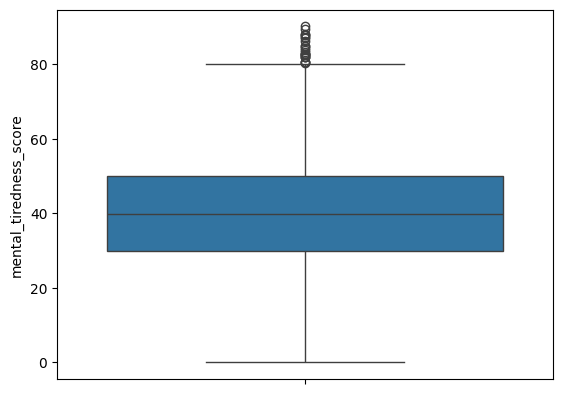

In [9]:
def check_outliers(df):
    for column in df.columns:
        if df[column].dtype != "O":
            sns.boxplot(df[column])
            plt.show()
check_outliers(df)

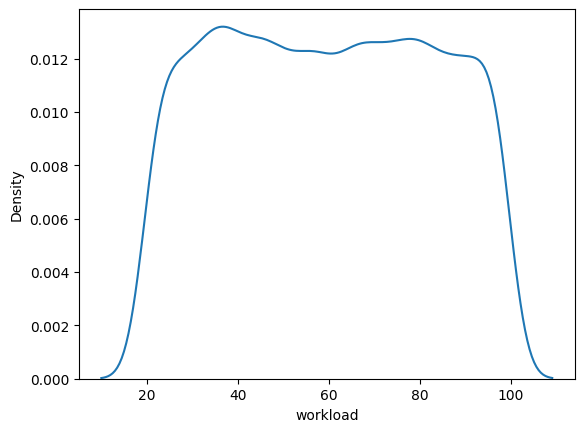

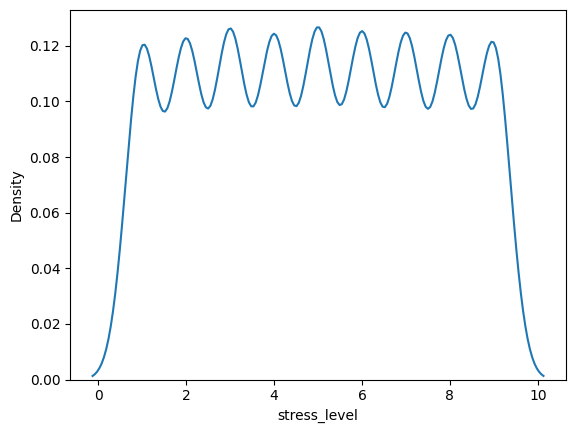

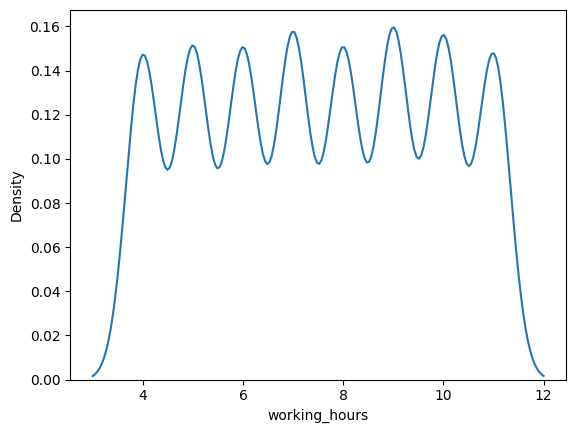

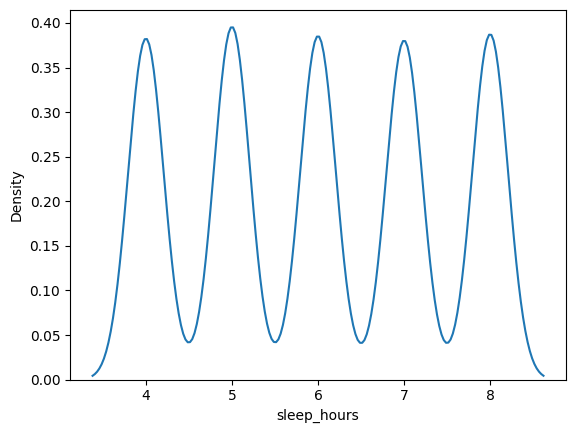

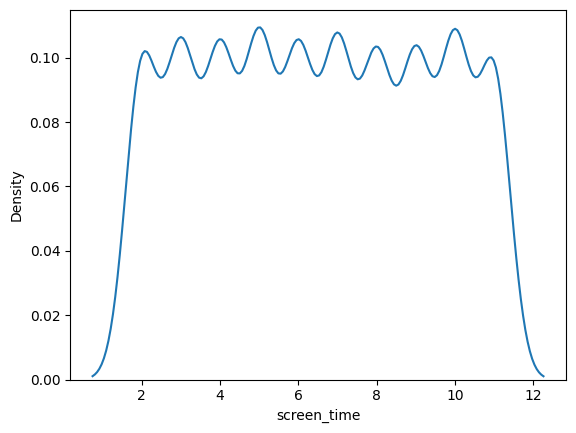

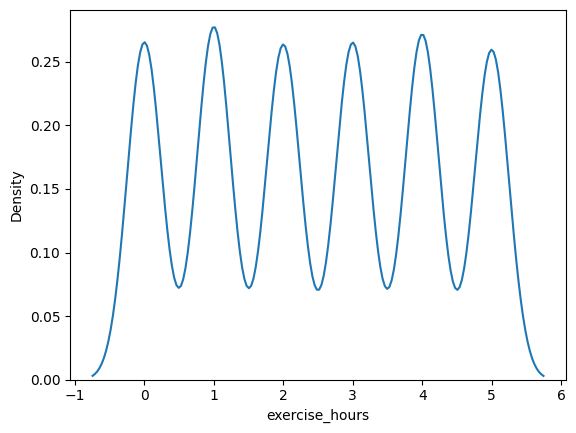

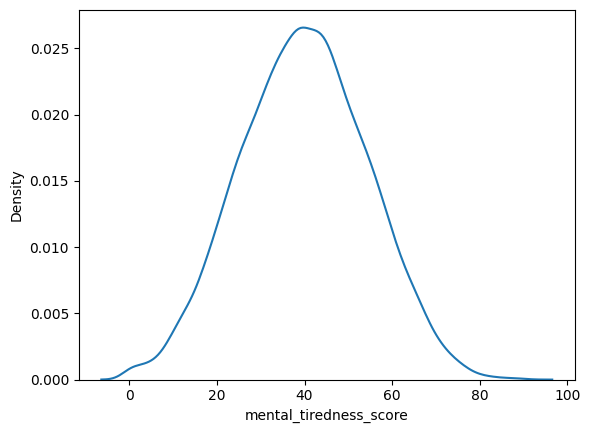

In [10]:
def check_distribution(df):
    for column in df.columns:
        if df[column].dtype != "O":
            sns.kdeplot(df[column])
            plt.show()
check_distribution(df)

In [11]:
y = df["mental_tiredness_score"]
X = df.drop(columns=["mental_tiredness_score"])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12000, 9)
(3000, 9)
(12000,)
(3000,)


In [13]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
transformer = ColumnTransformer(transformers=[("cat", OrdinalEncoder(), cat_cols),("num", StandardScaler(), num_cols)])
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)

In [14]:
X_train_trans = pd.DataFrame(X_train_trans, columns=X_train.columns)
X_test_trans = pd.DataFrame(X_test_trans, columns=X_test.columns)
X_train_trans.head()

,workload,stress_level,working_hours,sleep_hours,screen_time,exercise_hours,gender,job_role,work_type
0,0.0,0.0,2.0,-1.589770,-0.000550,0.213054,-0.699162,-0.874970,0.302758
1,1.0,3.0,2.0,0.192325,-1.553407,0.651437,-1.405921,-0.180090,-0.283982
2,1.0,4.0,1.0,-1.546304,1.164093,1.089819,-0.699162,0.514791,0.302758
3,1.0,3.0,2.0,-1.459372,-0.000550,-0.225329,0.714357,-0.527530,0.302758
4,1.0,4.0,0.0,0.713914,-1.165193,-0.225329,0.714357,0.167350,-0.870723


In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
train_scores = []
test_scores = []
values = [i for i in range(1, 21)]
for i in values:
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train_trans, y_train)
    y_train_pred = model.predict(X_train_trans)
    train_scores.append(r2_score(y_train, y_train_pred))
    y_test_pred = model.predict(X_test_trans)
    test_scores.append(r2_score(y_test, y_test_pred))

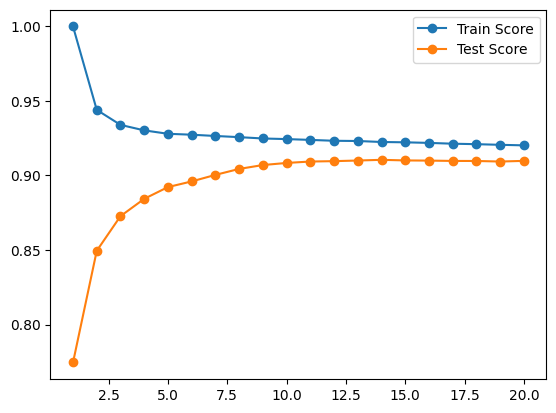

In [16]:
plt.plot(values, train_scores, "-o", label="Train Score")
plt.plot(values, test_scores, "-o", label="Test Score")
plt.legend()
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{"n_neighbors": [i for i in range(1, 51)], "p": [1, 2]}]
clf = GridSearchCV(estimator=KNeighborsRegressor(),param_grid=tuned_parameters,scoring="r2",cv=5,return_train_score=True,verbose=1)
clf.fit(X_train_trans, y_train)
print("Best parameters:", clf.best_params_)
print("Best model:", clf.best_estimator_)
print("Test score:", clf.score(X_test_trans, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'n_neighbors': 17, 'p': 2}
Best model: KNeighborsRegressor(n_neighbors=17)
Test score: 0.9097753763533085


In [18]:
model = KNeighborsRegressor(n_neighbors=21,p=1)
model.fit(X_train_trans, y_train)

KNeighborsRegressor(n_neighbors=21, p=1)

In [19]:
y_pred = model.predict(X_test_trans)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("Final R2 Score:", score)

Final R2 Score: 0.9007463180038103


In [20]:
import pickle

# Save transformer
with open("transformer.pkl", "wb") as f:
    pickle.dump(transformer, f)

# Save model
with open("knn_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save column order
with open("columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)